In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [2]:
iris = pd.read_csv('Iris.csv')
iris.drop(['Id'], axis = 1, inplace = True)

In [3]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
trainX, testX, trainY, testY = train_test_split(iris.drop(['Species'], axis =1), iris.Species, test_size= 0.25, 
                                                stratify = iris['Species'])

In [5]:
parameters_test = {'criterion':['gini','entropy'], 'splitter':['best', 'random']}

In [6]:
classficator = DecisionTreeClassifier()

In [7]:
grid = GridSearchCV(estimator = classficator, param_grid = parameters_test, scoring='accuracy', n_jobs= -1, cv=4)

In [8]:
grid.fit(trainX, trainY)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [9]:
print(pd.DataFrame(grid.cv_results_))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002494      0.000498         0.001495        0.000498   
1       0.002245      0.000432         0.001745        0.000432   
2       0.002743      0.000432         0.001246        0.000432   
3       0.001246      0.000431         0.000748        0.000432   

  param_criterion param_splitter  \
0            gini           best   
1            gini         random   
2         entropy           best   
3         entropy         random   

                                           params  split0_test_score  \
0       {'criterion': 'gini', 'splitter': 'best'}           1.000000   
1     {'criterion': 'gini', 'splitter': 'random'}           0.933333   
2    {'criterion': 'entropy', 'splitter': 'best'}           1.000000   
3  {'criterion': 'entropy', 'splitter': 'random'}           0.966667   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           1.000000           0.925926    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [10]:
print(pd.DataFrame(grid.cv_results_)[['params',  'mean_test_score']])

                                           params  mean_test_score
0       {'criterion': 'gini', 'splitter': 'best'}         0.964286
1     {'criterion': 'gini', 'splitter': 'random'}         0.946429
2    {'criterion': 'entropy', 'splitter': 'best'}         0.964286
3  {'criterion': 'entropy', 'splitter': 'random'}         0.937500


In [11]:
grid.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [12]:
del(grid, parameters_test)

In [13]:
classficator = DecisionTreeClassifier(criterion='gini', splitter='best')

In [14]:
classficator.fit(trainX, trainY)
predict = classficator.predict(testX)

In [15]:
print(confusion_matrix(testY, predict))

[[12  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [16]:
print(classification_report(testY, predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

      micro avg       0.97      0.97      0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [17]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [18]:
dot_data = StringIO()
export_graphviz(classficator, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

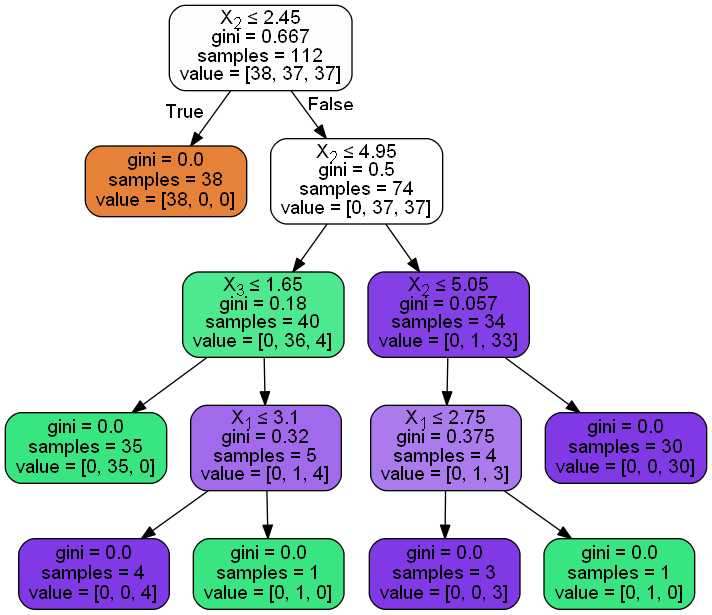

In [19]:
Image(graph.create_png())